In [10]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt

import glob
import random
import tensorflow as tf
from shutil import rmtree
from keras.models import load_model
from os.path import join, getctime, basename
from models import *
from utils import *
from data_preprocess import load_prep_data

%load_ext autoreload
%autoreload 2

aug_data = load_prep_data(time=500, debug=True, onehot=True)
x_train = aug_data['x_train']
y_train = aug_data['y_train']
x_valid = aug_data['x_valid']
y_valid = aug_data['y_valid']
x_test = aug_data['x_test']
y_test = aug_data['y_test']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Shape of x_train set: (7191, 22, 250)
Shape of y_train labels: (7191, 4)
Shape of x_valid set: (1269, 22, 250)
Shape of y_valid labels: (1269, 4)
Shape of x_test set: (1772, 22, 250)
Shape of y_test labels: (1772, 4)
Shape of x_train_valid set: (8460, 22, 250)
Shape of y_train_valid labels: (8460, 4)


In [11]:
input_shape = x_train.shape
x_train = tf.transpose( tf.expand_dims(x_train, axis=-1), perm=[0, 2, 3, 1])
x_valid = tf.transpose( tf.expand_dims(x_valid, axis=-1), perm=[0, 2, 3, 1])

print("x_train.shape: {}", format(x_train.shape))

x_train.shape: {} (7191, 250, 1, 22)


## 4 Layers CNN + GRU

In [31]:
config = {
    # Network
    'num_inputs': x_train.shape[0],
    'input_shape': (input_shape[2], 1, input_shape[1]),
    'epochs': 100,
    'dropout': 0.5,
    'batch_size': 32
}
CNN4LayerGRU = CNN4LayerGRU()
CNN4LayerGRU.build_model(config)
history = CNN4LayerGRU.train(x_train, y_train, x_valid, y_valid, config, get_workpath('CNN4LayerGRU'))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 250, 1, 25)        13775     
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 84, 1, 25)         0         
 ng2D)                                                           
                                                                 
 batch_normalization_24 (Ba  (None, 84, 1, 25)         100       
 tchNormalization)                                               
                                                                 
 dropout_30 (Dropout)        (None, 84, 1, 25)         0         
                                                                 
 conv2d_25 (Conv2D)          (None, 84, 1, 50)         31300     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 28, 1, 50)        

In [32]:
x_test_transposed = tf.transpose( tf.expand_dims(x_test, axis=-1), perm=[0, 2, 3, 1])
raw = CNN4LayerGRU.evaluate(x_test_transposed, y_test)
print("Raw Acc result: {}".format(raw[1]))
replace_model_if_better('CNN4LayerGRU', np.mean(raw[1]), CNN4LayerGRU, config)

56/56 [==============================] - 1s 15ms/step - loss: 0.7165 - accuracy: 0.7218
Raw Acc result: 0.7217832803726196
Old model exists. Comparing performance.
New model is better than the old one. Replacing the old model with the new model.


True

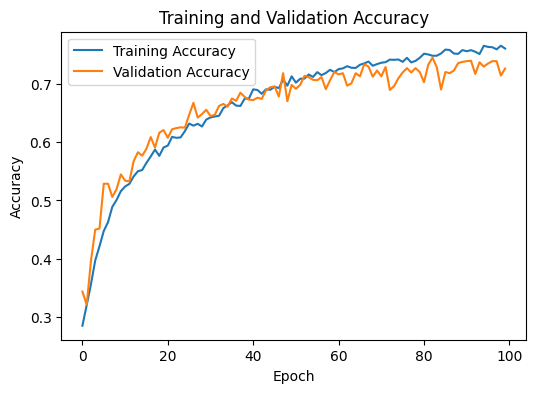

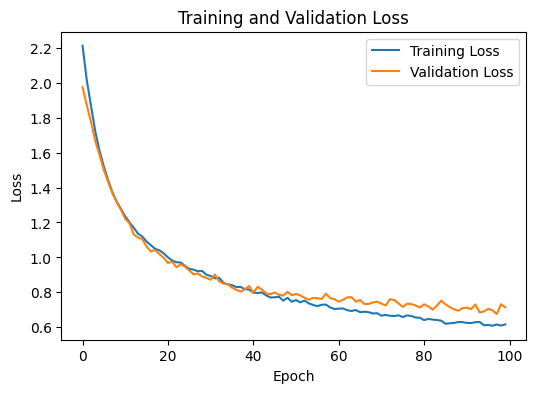

In [33]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()